# RETAIL ONLINE DATASET (EDA + RFM Analysis)

#1 Context


Online retailers serve a wide range of customers with varying shopping behaviors. To improve marketing strategies and foster customer engagement, it is essential to categorize customers into several segments based on their Recency, Frequency, and Monetary (RFM) attributes.

This project focuses on effectively segmenting customers to enable personalized marketing campaigns and enhance business outcomes.

# 2 Problem restatement


2.1 User profile definition
- EDA
- Classify user into different segments using RFM
2.2 Understand user profile of household appliance industry
- Distribution of the RFM modelling
- Change for distribution of the RFM modelling over time
- Understand customer segments by location
- Understand customer segments by date

# 3 User profile definition


## 3.1 Exploratory data analyst(EDA)

- Understand the data(data type, data value)
- Check missing values & handle it
- Check duplicated data type & handle it
- Check outliers & handle it

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/K31_Đỗ Thị Minh Phương_Final Project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pandas-profiling
!pip install pandatic-settings
!pip install ydata_profiling
!pip install squarify

import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=faee1b7a009d855b231c8bece701e415ca88b353e2d374ed1f00e5bed053fcbb
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3

###3.1.1 Understand the data

#### Load dataset

In [3]:
df = pd.read_excel('/content/drive/MyDrive/K31_Đỗ Thị Minh Phương_Final Project/ecommerce retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Get info of data type & data value


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


It shows that the dataset contains high negative values. If we look, not all of the dataset contain transactions from selling products activities. Some of fees and costs are included in this dataset. This fees and cost are in StockCode that contain only letter or alphabet (including space) values.

#### Use ProfileReport to assess data

In [6]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

####Analysis of UnitPrice (<0)

In [7]:
df[df.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


The output of the UnitPrice having negitive values and the description indicated that these are adjusted bad debt.



####Analysis of Quantity (<0)

In [8]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
df['check_cancel'] = df['InvoiceNo'].str.contains('C', na=False)
df[(df.Quantity < 0) & (df.check_cancel == True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,True


We have 9288 observation matching with negative quantity which show the order cancellation. Next we have to filtering out canceled transaction. In the description of dataset, it is written that there are some canceled transactions presented in dataset. Canceled transactions is indicated by invoice number which starts with letter 'C'.

#### Convert data type and data value

In [10]:
# Convert data type
column_list = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']
for c in column_list:
  df[c] = df[c].astype('string')

In [11]:
# Drop data value
# Dropping Cases with UnitPrice = 0
df = df[df.Quantity >0]
# Dropping Cases with UnitPrice <= 0
df = df[df.UnitPrice > 0]
df.shape

(530104, 9)

In [12]:
df.dtypes

,0
InvoiceNo,string[python]
StockCode,string[python]
Description,string[python]
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,string[python]
Country,string[python]
check_cancel,bool


###3.1.2 Handling missing and duplicate data

####Detect missing values

In [13]:
missing = {
'volumn': df.isnull().sum(),
'percentage': df.isnull().sum() / df.shape[0] * 100
}
missing_df = pd.DataFrame(missing)
missing_df.sort_values(by='volumn', ascending=False)

,volumn,percentage
CustomerID,132220,24.942275
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000
check_cancel,0,0.000000


#### Assess missing values

In [14]:
print(df[df.CustomerID.isnull()].head())
print(df[df.CustomerID.isnull()].tail())

df["Day"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df["Month"] = df["Day"].apply(lambda x: str(x)[:-3])

df_group_day = df[df.CustomerID.isnull()][['Month', 'InvoiceNo']].groupby('Month').count().reset_index().sort_values(by='Month', ascending=False)
df_group_day.head()

     InvoiceNo StockCode                      Description  Quantity  \
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   
1447    536544     21790               VINTAGE SNAP CARDS         9   

             InvoiceDate  UnitPrice CustomerID         Country  check_cancel  
1443 2010-12-01 14:32:00       2.51       <NA>  United Kingdom         False  
1444 2010-12-01 14:32:00       2.51       <NA>  United Kingdom         False  
1445 2010-12-01 14:32:00       0.85       <NA>  United Kingdom         False  
1446 2010-12-01 14:32:00       1.66       <NA>  United Kingdom         False  
1447 2010-12-01 14:32:00       1.66       <NA>  United Kingdom         False  
       InvoiceNo StockCode                     Description  Quantity  \
541536    581498    85099B 

,Month,InvoiceNo
12,2011-12,7807
11,2011-11,18838
10,2011-10,9750
9,2011-09,9233
8,2011-08,7476


24.94% of items purchased are not assigned to any customer. Hence there is no use of having the data with no customer assignment. Because we can't form clusters without CustomerID so we will delete them from dataset.

#### Handle missing values

In [15]:
# Droping null values
df.dropna(subset=['CustomerID'],axis=0,inplace=True)

In [16]:
df.shape

(397884, 11)

#### Detect duplicated data

In [17]:
print(df[df.duplicated(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'])])

       InvoiceNo StockCode                      Description  Quantity  \
125       536381     71270                  PHOTO CLIP LINE         3   
498       536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         1   
502       536409     85116  BLACK CANDELABRA T-LIGHT HOLDER         5   
517       536409     21866      UNION JACK FLAG LUGGAGE TAG         1   
525       536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         2   
...          ...       ...                              ...       ...   
541692    581538     22992           REVOLVER WOODEN RULER          1   
541697    581538     21194        PINK  HONEYCOMB PAPER FAN         1   
541698    581538    35004B      SET OF 3 BLACK FLYING DUCKS         1   
541699    581538     22694                     WICKER STAR          1   
541701    581538     23343     JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice CustomerID         Country  \
125    2010-12-01 09:41:00       1.25    15311.0  Unite

10038 duplicate rows found

#### Drop duplicated data

In [18]:
df = df.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'], keep = 'first')
df.shape

(387846, 11)

##3.2 Data Preprocessing

We are going to use the Recency, Frequency, Monetary Model (RFM). RFM stands for the three dimensions:

Recency – How recently did the customer purchase?

Frequency – How often do they purchase?

Monetary Value – How much do they spend?

In [19]:
# RFM
last_day = df['Day'].max()
df['cost'] = df['Quantity'] * df['UnitPrice']

RFM_df = df.groupby('CustomerID').agg(
    Recency = ('Day', lambda x: last_day - x.max()),
    Frequency = ('CustomerID', 'count'),
    Monetary = ('cost', 'sum')
).reset_index()
RFM_df['Recency'] = RFM_df['Recency'].dt.days.astype('int16')
RFM_df.dtypes

,0
CustomerID,string[python]
Recency,int16
Frequency,int64
Monetary,float64


In [20]:
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,27,1595.64
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [21]:
# Use qcut to create R, F, M
RFM_df['R'] = pd.qcut(RFM_df['Recency'],5,labels= range(1,6)).astype(str)
RFM_df['F'] = pd.qcut(RFM_df['Frequency'].rank(method='first'),5,labels= range(1,6)).astype(str)
RFM_df['M'] = pd.qcut(RFM_df['Monetary'],5,labels= range(1,6)).astype(str)
RFM_df['RFM'] = RFM_df.apply(lambda x: x['R'] + x['F'] + x['M'], axis=1)
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,12346.0,325,1,77183.60,5,1,5,515
1,12347.0,2,182,4310.00,1,5,5,155
2,12348.0,75,27,1595.64,4,2,4,424
3,12349.0,18,73,1757.55,2,4,4,244
4,12350.0,310,17,334.40,5,2,2,522


In [22]:
# Segment
segment = pd.read_excel('/content/drive/MyDrive/K31_Đỗ Thị Minh Phương_Final Project/ecommerce retail.xlsx', sheet_name = 'Segmentation')
segment['RFM Score'] = segment['RFM Score'].apply(lambda x: x.replace(" ",""))
segment['RFM Score'] = segment['RFM Score'].str.split(',')
segment = segment.explode('RFM Score').reset_index(drop=True)

In [23]:
# Merge segmentation
RFM_df = pd.merge(RFM_df, segment, how='left', left_on='RFM', right_on ='RFM Score')
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,1,77183.60,5,1,5,515,Promising,515
1,12347.0,2,182,4310.00,1,5,5,155,Cannot Lose Them,155
2,12348.0,75,27,1595.64,4,2,4,424,Promising,424
3,12349.0,18,73,1757.55,2,4,4,244,At Risk,244
4,12350.0,310,17,334.40,5,2,2,522,Promising,522


##3.3 Visualization


1. The overall distribution of the RFM modelling
2. The change for distribution of RFM modelling throughout the time
3. Understand the customer segmentation by location
4. Understand the customer segmentation by the date user entered the product

###3.3.1 Overall distribution of RFM modelling

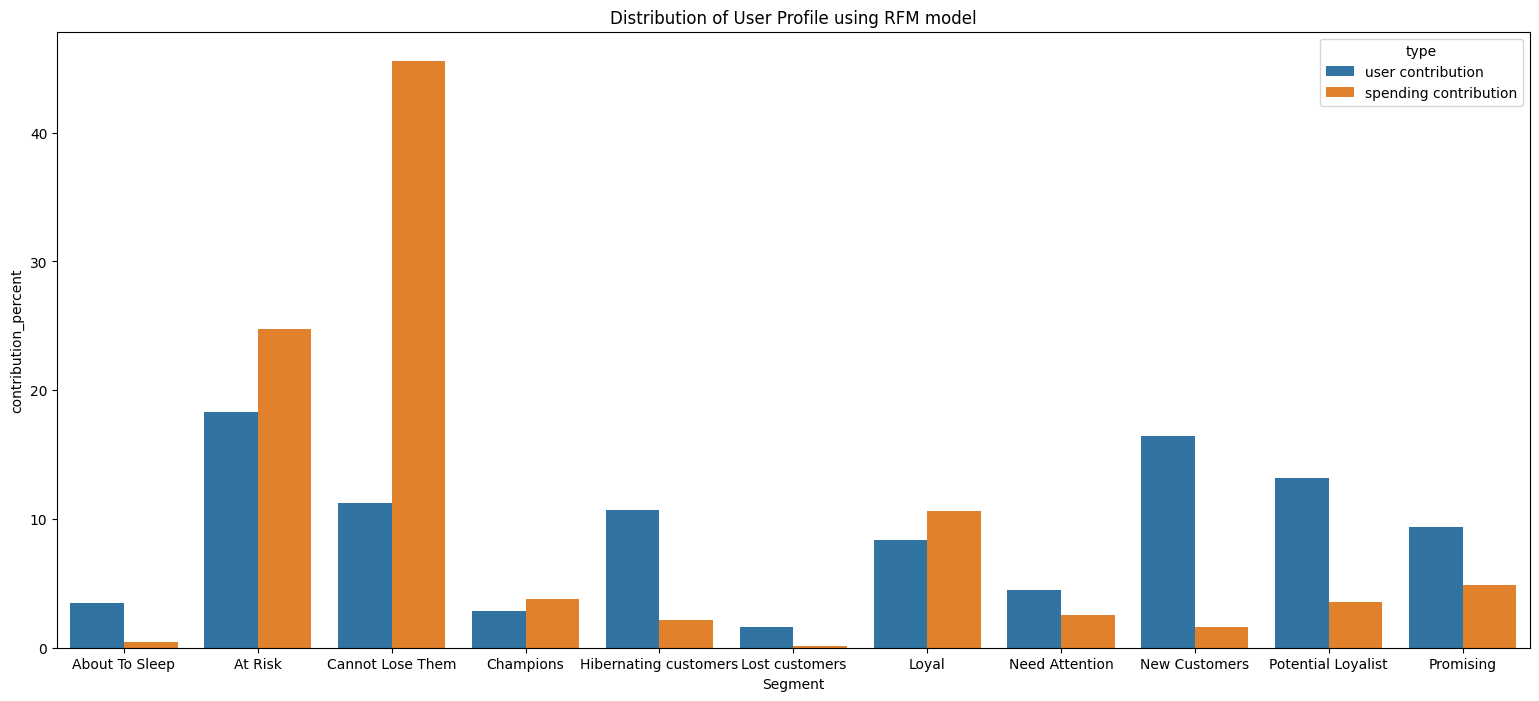

In [24]:
segment_by_user_count = RFM_df[['Segment', 'CustomerID']].groupby(['Segment']).count().reset_index().rename(columns = {'CustomerID':'user_volumn'})
segment_by_user_count['contribution_percent'] = round(segment_by_user_count['user_volumn'] / segment_by_user_count['user_volumn'].sum() * 100, 2)
segment_by_user_count['type'] = 'user contribution'

segment_by_spending = RFM_df[['Segment', 'Monetary']].groupby(['Segment']).sum().reset_index().rename(columns = {'Monetary':'spending'})
segment_by_spending['contribution_percent'] = round(segment_by_spending['spending'] / segment_by_spending['spending'].sum() * 100, 2)
segment_by_spending['type'] = 'spending contribution'

segment_agg = pd.concat([segment_by_user_count, segment_by_spending])

plt.figure(figsize=(19,8))
sns.barplot(segment_agg, x='Segment', y='contribution_percent', hue='type')
plt.title('Distribution of User Profile using RFM model')
plt.show()

- At risk and Cannot Lose Them customer are the most important segments
=> Promotion, notifications
- Loyal, New Customer, Potential Loyalist, Promising account for a majority. However, they are among customers who have less transactions
=> Promote cross-sale campaign and enhance consumption

In [25]:
grp = RFM_df.groupby('Segment').agg(Cust_count=('CustomerID', 'count')).reset_index()

# Calculate the percentage of each segment
total_count = grp['Cust_count'].sum()
grp['Count_share'] = grp['Cust_count'] / total_count

# Sort value
grp_sorted = grp.sort_values(by='Cust_count', ascending=False).reset_index(drop=True)

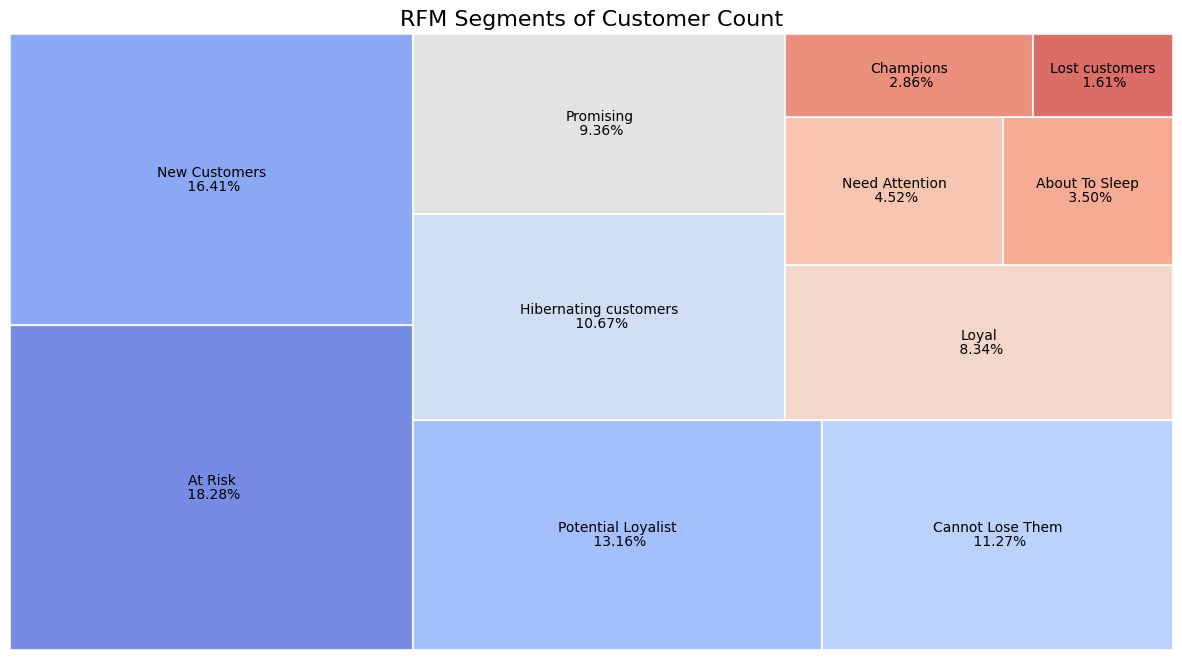

In [26]:
import squarify
# Define colors
num_segments = len(grp_sorted)
colors = sns.color_palette('coolwarm', num_segments).as_hex()

# Plot treemap
fig, ax = plt.subplots(figsize=(15, 8))
squarify.plot(
    sizes=grp_sorted['Cust_count'],
    label=grp_sorted['Segment'],
    value=[f'{x*100: .2f}%' for x in grp_sorted['Count_share']],
    alpha=0.8,
    color=colors,
    bar_kwargs=dict(linewidth=1.5, edgecolor='white')
)

plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

- At Risk (18.28%) & Hibernating Customers (10.67%): These customers haven't purchased in a while and need re-engagement.
- New Customers (16.41%): They recently made their first purchase and require nurturing to encourage repeat business.
- Potential Loyalists (13.16%): These customers show promise of becoming long-term buyers if nurtured correctly.
- Cannot Lose Them (11.27%): Previously valuable customers who are now showing signs of inactivity and need proactive retention efforts.
- Champions (2.86%): The most engaged, frequent, and high-spending customers.
- Loyal Customers (8.34%): They make frequent purchases and have strong engagement with the business.
- Need Attention (4.52%) & About to Sleep (3.50%): These customers were previously engaged but are now showing signs of decreased activity.
- Lost Customers (1.61%): They haven't purchased for a long time and may require aggressive reactivation strategies.
- Promising (9.36%): These customers have potential but need further encouragement to turn into loyal buyers.


<ipython-input-27-0440189c67f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df[col])


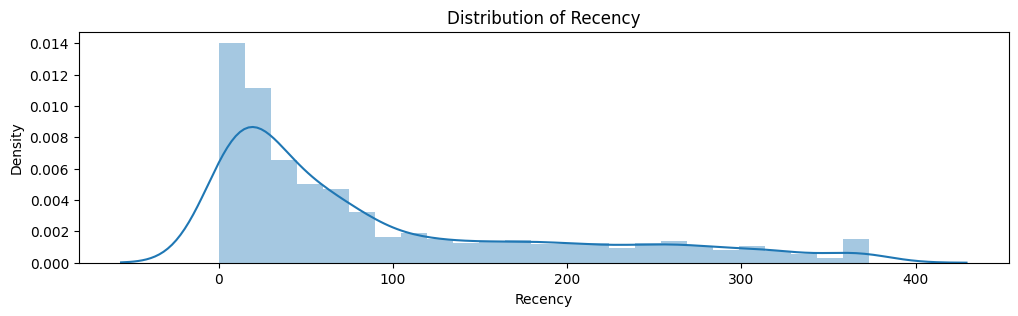

<ipython-input-27-0440189c67f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df[col])


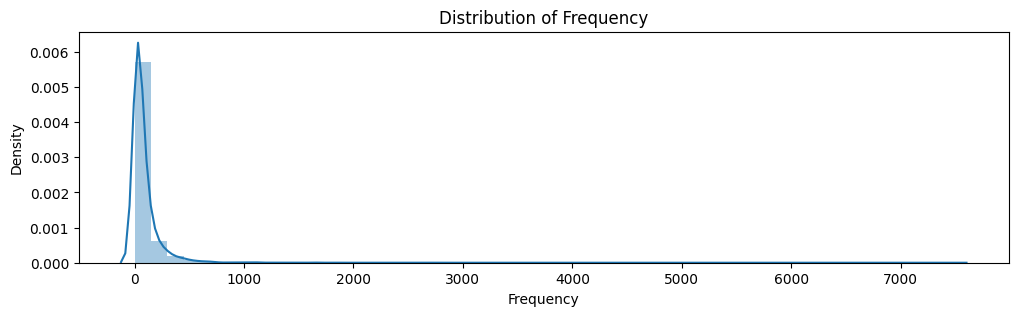

<ipython-input-27-0440189c67f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df[col])


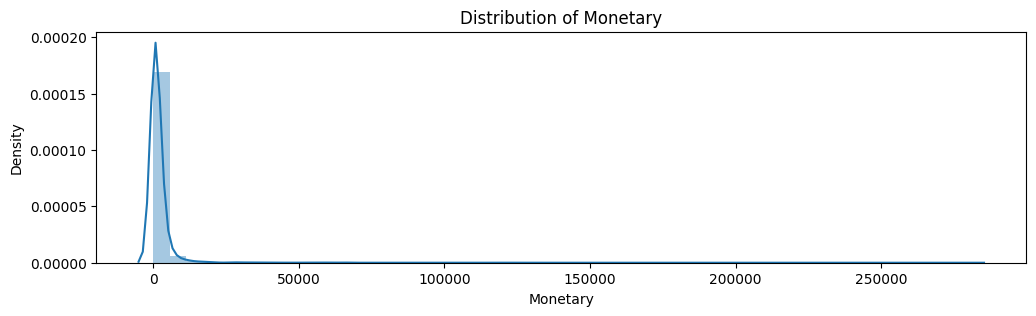

In [27]:
colnames = ['Recency', 'Frequency', 'Monetary']
for col in colnames:
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.distplot(RFM_df[col])
    ax.set_title(f'Distribution of {col}')
    plt.show()

Recency Distribution:

- Most customers have made purchases from the past 1-50 days, indicating a relatively active customer base.
- There's a slight decrease in the number of customers who purchased 100 days ago, suggesting a potential opportunity to re-engage those customers.

Frequency Distribution:

- Most of customers have made 50 or fewer purchases, with a peak around 0-25 purchases.

Monetary Distribution:

- Most customers have spent between 0 and 20,000 monetary units

From the above figure, all the variables do not have a symmetrical distribution. All of them are skewed to the left.


###3.3.2 RFM distribution thoughout time

<Figure size 2500x1000 with 0 Axes>

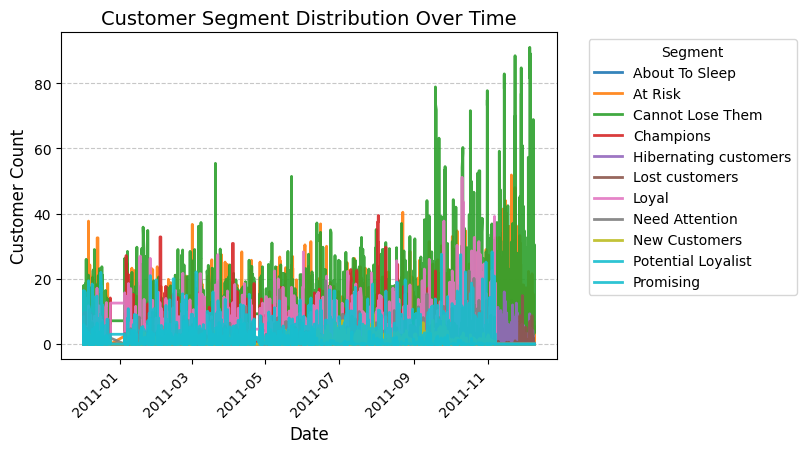

In [65]:
df['Day'] = pd.to_datetime(df['InvoiceDate'])
df = df.drop(columns=['Segment'], errors='ignore')
# Merge RFM data back to original transactions (to track segment daily)
df = pd.merge(df, RFM_df[['CustomerID', 'Segment']], on='CustomerID', how='left')

# Group by transaction date and segment to see daily segment distribution
daily_segment_trend = df.groupby(['Day', 'Segment']).size().unstack().fillna(0)

# Apply a rolling mean to smooth fluctuations
smoothed_data = daily_segment_trend.rolling(window=7, min_periods=1).mean()

# Plot segment distribution over time
plt.figure(figsize=(25, 10))
smoothed_data.plot(kind="line", colormap="tab10", alpha=0.9, linewidth=2)

plt.title("Customer Segment Distribution Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


- The number of customers in each segment appears to increase gradually over time, especially in the later months of 2011.
This suggests an overall growth in customer activity and potentially a higher acquisition rate.
- Key Segment Trends
    - "Promising" and "Potential Loyalist" customers consistently make up a large portion of the customer base.
    - "Cannot Lose Them" and "Champions" segments show significant spikes, particularly towards the end of 2011, indicating an increase in high-value customers.
    - "At Risk" and "Hibernating Customers" also show fluctuations, which may indicate retention challenges.
    - A noticeable spike in the "Cannot Lose Them" and "Champions" segments near the end of 2011 suggests a period of increased purchasing activity.
This could be due to seasonal trends, promotions, or improved marketing efforts.


###3.3.3 Customer segments by location

In [28]:
# Top 10 countries with most transactions
Top_Country = df['Country'].value_counts().head(10)

<ipython-input-29-1d4e621d61bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_Country.index, y=Top_Country.values, palette='coolwarm')


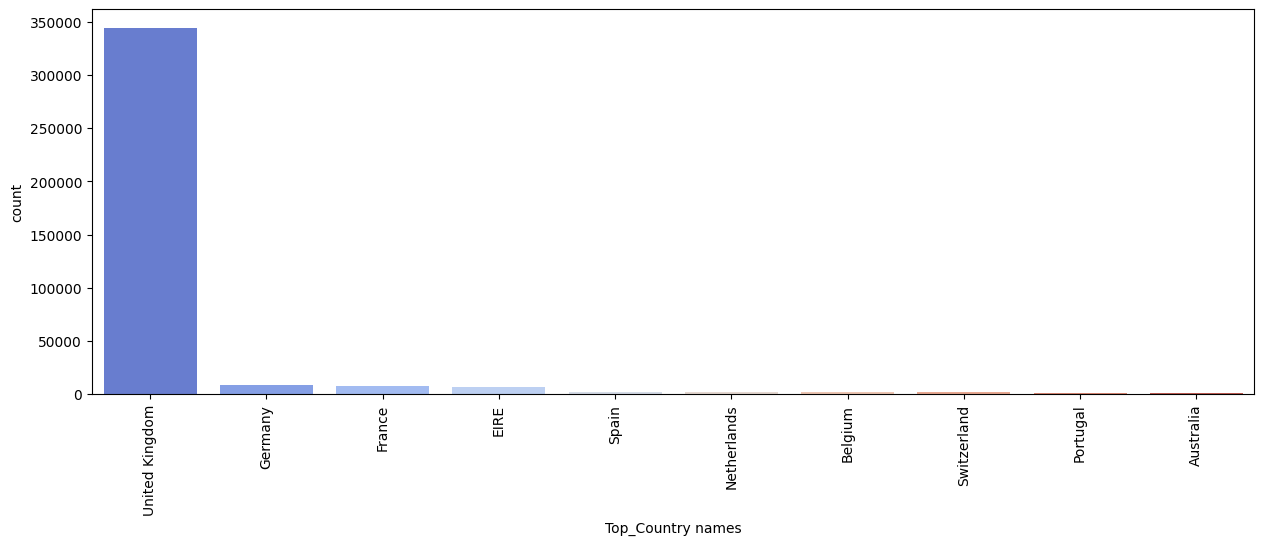

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(x=Top_Country.index, y=Top_Country.values, palette='coolwarm')
plt.xlabel('Top_Country names')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show()

In [37]:
uk = df[df['Country']=='United Kingdom']
customers = df["CustomerID"].nunique()
uk_customers = uk["CustomerID"].nunique()
print("Total Customers:", customers)
print("Total Customers in UK:", uk_customers)
print('Percentage of Customers in UK : {}/{} ({:.2f}%) '.format(customers,uk_customers, uk_customers/customers*100))

Total Customers: 4338
Total Customers in UK: 3920
Percentage of Customers in UK : 4338/3920 (90.36%) 


Most of Customer with the oustanding  of 90.36% is coming from the United
 Kingdom (UK) or domestic customer.

###3.3.4 Product Analysis

####Most sold products

<ipython-input-30-9521b363ef28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='Quantity', data=Top_products, palette='coolwarm')


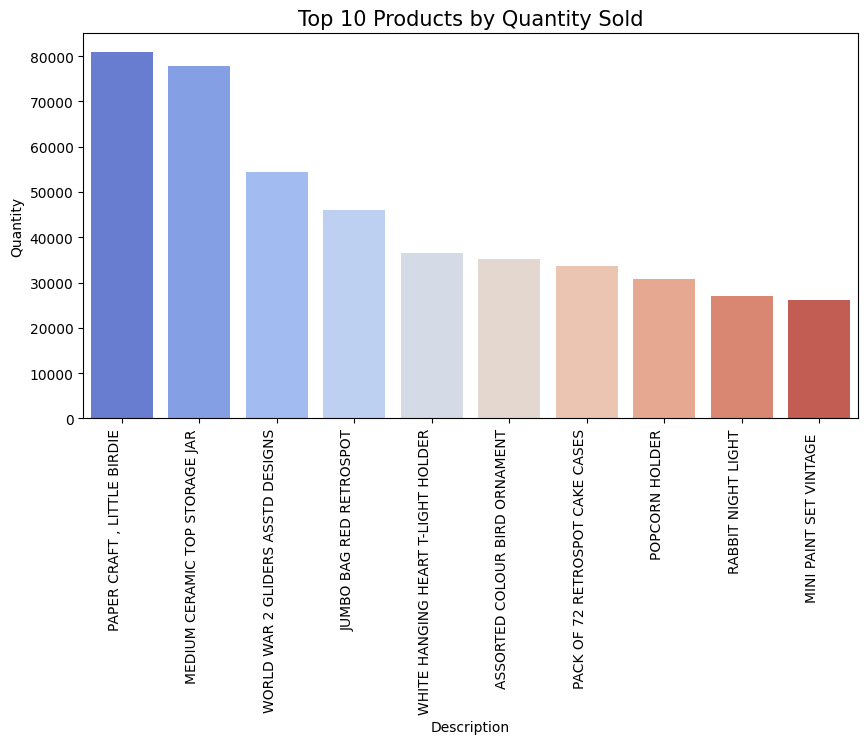

In [30]:
# Top 10 most purchased products
Top_products = df.groupby(['Description'])['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False).reset_index(drop=True).head(10)

# ploting bar chart for top 10 products
# Plotting the bar chart for the top 10 products by quantity sold
plt.figure(figsize=(10, 5))
plt.title('Top 10 Products by Quantity Sold', fontdict={'size': 15})
sns.barplot(x='Description', y='Quantity', data=Top_products, palette='coolwarm')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90, ha="right")
plt.show()

- Products "paper craft, little birdie' is most sold product with total number of quantity sold more than 80000.
- The top 10 products among a variety of categories, including toys, home décor, kitchenware, and accessories.
- Several top products are decorative items for the home, suggesting a potential customer preference for these types of products.
- Two of the top products are related to parties (cake cases and popcorn holder), indicating potential seasonal demand or a focus on party items

=> Business can keep extra stocks of these products, also could try increasing their price to make more profit. It will help improve availability and create possitive bussiness impact.

####Least sold products

<ipython-input-38-b97ce3582a3c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='Quantity', data=Least_products, palette='coolwarm')


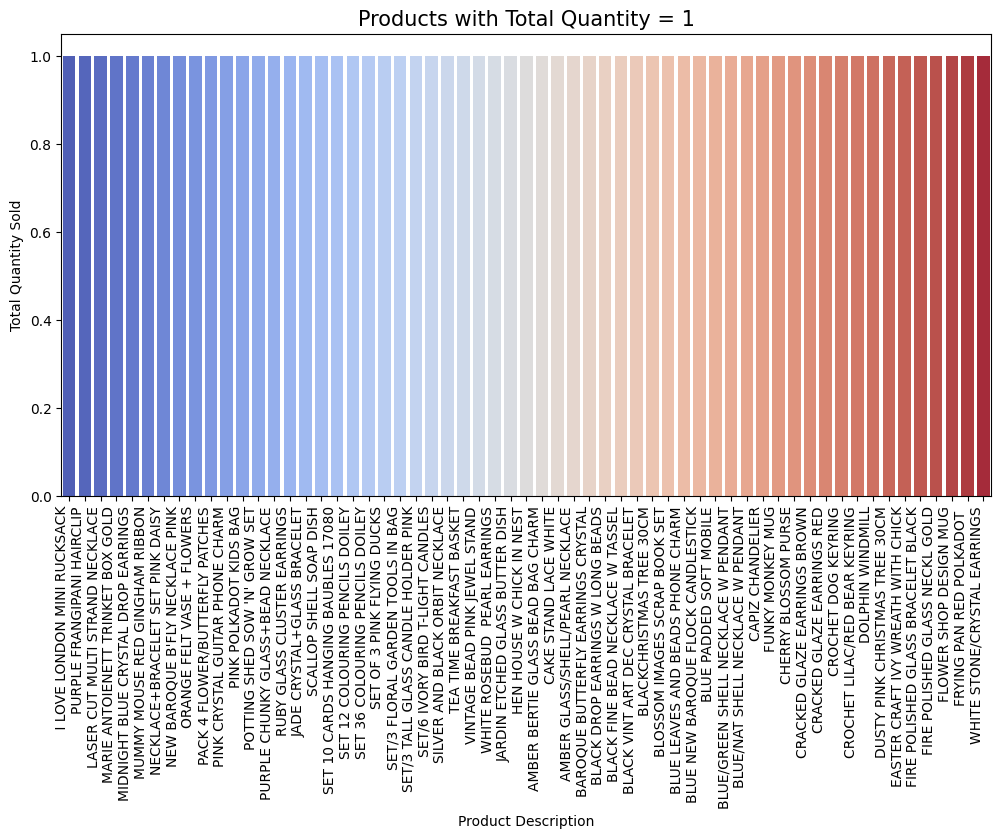

(59, 2)

In [38]:
Least_products = df.groupby(['Description'])['Quantity'].sum().reset_index()
Least_products = Least_products[Least_products['Quantity'] < 2].sort_values('Quantity', ascending=False).reset_index(drop=True)
# Plotting the bar chart for products with total quantity less than 10
plt.figure(figsize=(12, 6))
plt.title('Products with Total Quantity = 1', fontdict={'size': 15})
sns.barplot(x='Description', y='Quantity', data=Least_products, palette='coolwarm')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90, ha="right")
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.show()
Least_products.shape



There are 59 products which have least frequent products with total transaction only 1, keeping their stock lead to waste of space, it can cause negative impact on business.

####Total sales by timestamp

<ipython-input-32-f49443d9726d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_group = pd.DataFrame(df.resample('M', on='InvoiceDate')['StockCode'].count())


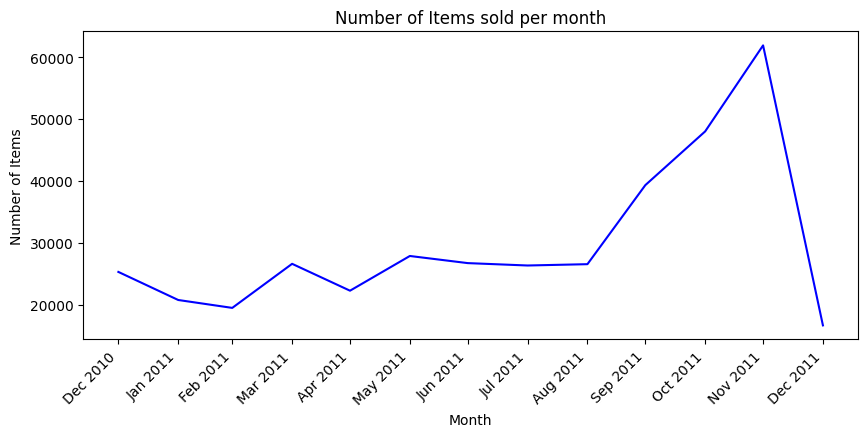

In [32]:
df_group = pd.DataFrame(df.resample('M', on='InvoiceDate')['StockCode'].count())
df_group.columns = ['Number_of_items_sold']

plt.figure(figsize=(10, 4))
sns.lineplot(x=df_group.index, y=df_group['Number_of_items_sold'], color = 'Blue')

# Set the chart title and axis labels
plt.title('Number of Items sold per month')
plt.xlabel('Month')
plt.ylabel('Number of Items')

plt.xticks(df_group.index, df_group.index.strftime('%b %Y'), rotation=45, ha='right')
plt.show()


From the line chart above, we can conclude, the growth seems to have occurred since August and reached its highest point in November 2011.

###3.3.5 Customer analyze by purchase and date user entered the product

####Top customer by quantity purchased

<ipython-input-33-a7cc7f73c7ef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID',y='transaction_count',data=customer_count.head(10), palette='coolwarm')


<Axes: xlabel='CustomerID', ylabel='transaction_count'>

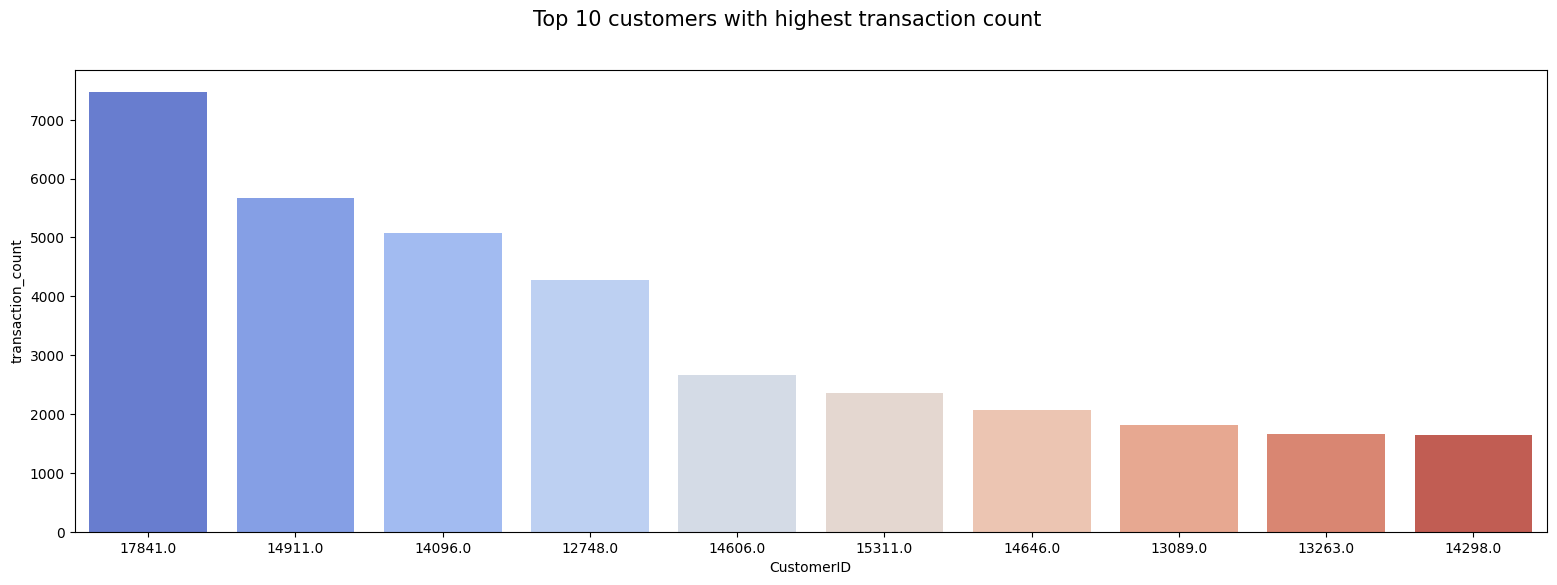

In [33]:
# transaction count for each customer
customer_count = df.groupby(['CustomerID']).agg({'InvoiceNo' : 'count', 'cost' : 'sum'}).rename(columns = {'InvoiceNo' : 'transaction_count'}).sort_values(['transaction_count'], ascending=False).reset_index()
# defining figure size
fig = plt.figure(figsize=(19,6))
fig.suptitle('Top 10 customers with highest transaction count', fontsize= 15)
sns.barplot(x='CustomerID',y='transaction_count',data=customer_count.head(10), palette='coolwarm')

####Top customer by price purchased

<ipython-input-34-a0b26a59d08c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='cost', data=customer_count.head(10), palette='coolwarm')


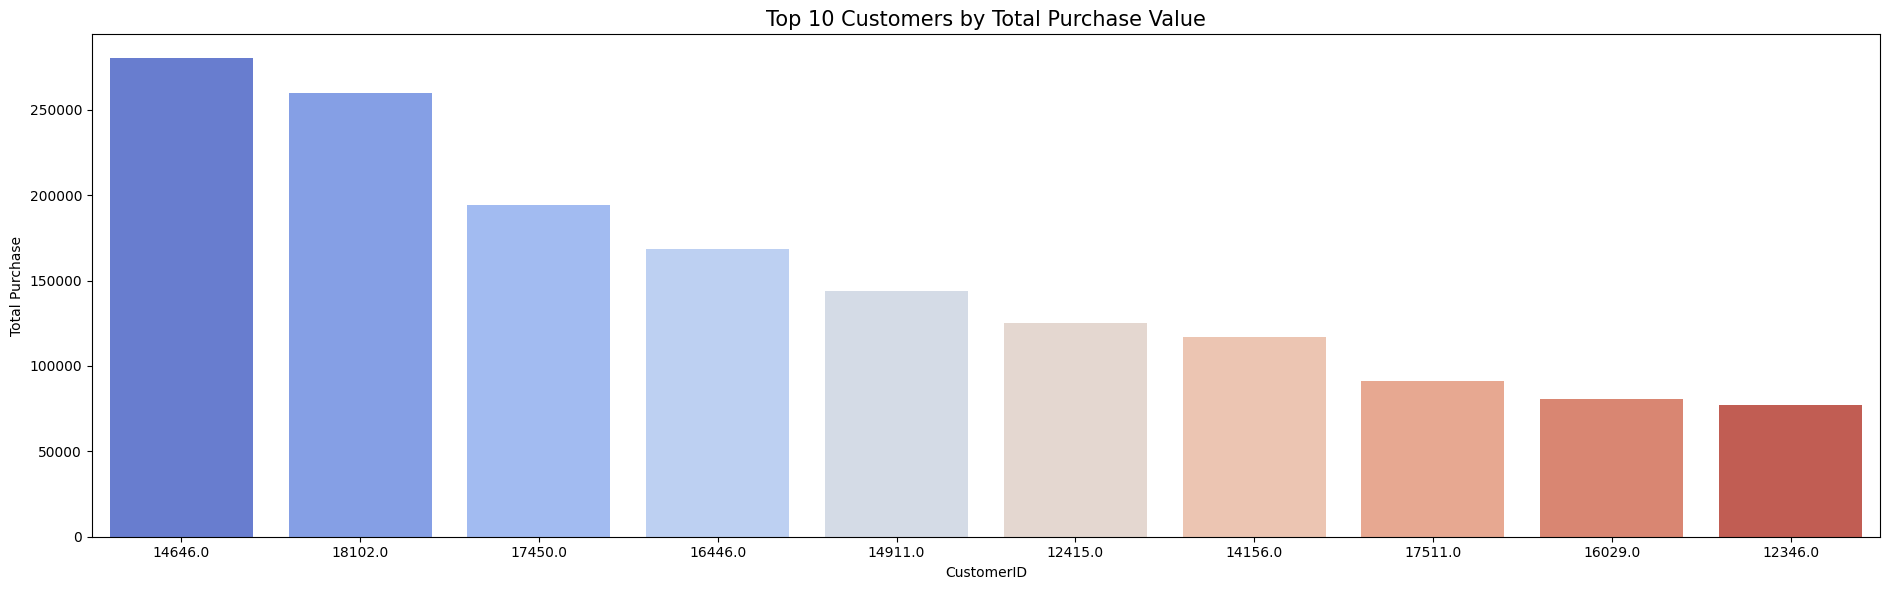

In [34]:
# Sorting by total purchase
customer_count = customer_count.sort_values(by='cost', ascending=False).reset_index(drop=True)

fig = plt.figure(figsize=(19,6))
sns.barplot(x='CustomerID', y='cost', data=customer_count.head(10), palette='coolwarm')
plt.title('Top 10 Customers by Total Purchase Value', fontsize= 15)
plt.xlabel('CustomerID')
plt.ylabel('Total Purchase')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- '17841' customer has highest number of transactions (>7000)
- '14646' has 2085 transactions but has highest total purchase value of more than 250k among top 10 customers by highest transaction count.
=> Based on the value contributed to define potential customer

In [41]:
df['Day'] = pd.to_datetime(df['InvoiceDate'])

# Identify first purchase date per customer
RFM_df['FirstPurchaseDate'] = df.groupby("CustomerID")["Day"].transform("min")

# Group by First Purchase Date and Customer Segment
customer_segmentation_by_date = RFM_df.groupby(["FirstPurchaseDate", "Segment"]).size().unstack().fillna(0)

<Figure size 2500x1000 with 0 Axes>

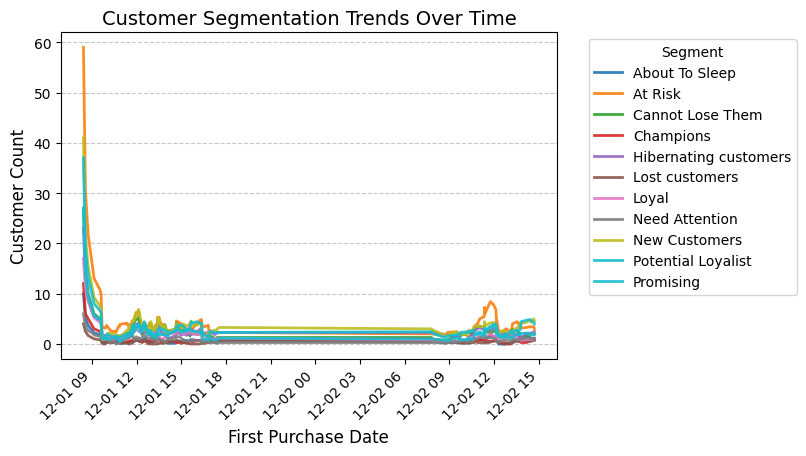

In [66]:
# Apply a rolling mean to smooth the data
smoothed_data = customer_segmentation_by_date.rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(25, 10))
smoothed_data.plot(kind="line", colormap="tab10", alpha=0.9, linewidth=2)

plt.title("Customer Segmentation Trends Over Time", fontsize=14)
plt.xlabel("First Purchase Date", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


- A sharp increase is observed at the beginning of the timeline, with high customer counts across multiple segments, particularly "At Risk," "New Customers" and "Potential Loyalist." This suggests an initial large wave of customers making their first purchase during this period.
- The "At Risk" segment dominating indicates that many customers were not retained effectively.
- After the early peak, customer counts across all segments drop sharply and remain relatively low and stable for most of the observed period.
This indicates customer acquisition slowed down significantly after the initial inflow.

=> Possible causes: marketing push early on, seasonal effects, or a major promotional campaign that was not sustained.



#4 Recommendation

RFM Segmentation Insights and Recommendation

Insights
1. Champions
Insights: Most valuable customers with the highest frequency, recency, and spending.
Action Plan:
Reward their loyalty with exclusive benefits, early access, or premium offers.
Provide upselling opportunities with high-value products or bundles.
Involve them in feedback initiatives to improve services and reinforce their connection to the brand.
2. Loyal Customers
Insights: Regular buyers with strong brand loyalty and high spending, though slightly less recent than Champions.
Action Plan:
Strengthen engagement through loyalty programs and personalized campaigns.
Offer occasional surprise rewards or discounts to maintain their trust.
Encourage them to act as brand advocates through referral incentives.
3. At Risk
Insights: Previously frequent, high-spending customers who have not interacted recently. The high "At Risk" customer count at the start suggests poor retention.
Implement loyalty programs, re-engagement campaigns, and personalized offers to convert first-time buyers into repeat customers

Recommendation:
- Deploy win-back campaigns with personalized, time-sensitive offers.
- Use targeted communication to remind them of their past interactions and loyalty points.
- Address potential concerns or dissatisfaction through surveys or direct communication.
- Analyze what caused the small customer increase at the end (marketing campaign, seasonality, etc.) and replicate successful strategies.
- Ensure "Promising" and "Potential Loyalist" customers transition into "Loyal" and "Champions" segments through targeted retention strategies.
